In [186]:
import pandas as pd
import numpy as np
from scipy.signal import argrelmax, argrelmin
from sympy import Symbol,solve
from PIL import Image
import math
import matplotlib.pyplot as plt

In [31]:
from tensorflow import keras as K

## Read Data

In [3]:
# experiment4.1
df1 = pd.read_csv("./displaySegments/data/result.csv")

In [4]:
df1

,name,prox_x,prox_y,dist_x,dist_y,l_percent,xcom_i,ycom_i,m_percent,torque_x,torque_y
0,r_foot,496.0,154.0,562.0,173.0,40.14,522.4924,161.6266,1.29,6.740152,2.084983
1,l_foot,423.0,154.0,458.0,208.0,40.14,437.0490,175.6756,1.29,5.637932,2.266215
2,r_shank,348.0,142.0,496.0,168.0,43.52,412.4096,153.3152,4.81,19.836902,7.374461
3,l_shank,324.0,29.0,425.0,149.0,43.52,367.9552,81.2240,4.81,17.698645,3.906874
4,r_thigh,165.0,92.0,323.0,126.0,36.12,222.0696,104.2808,14.78,32.821887,15.412702
5,l_thigh,165.0,92.0,324.0,29.0,36.12,222.4308,69.2444,14.78,32.875272,10.234322
6,r_upperarm,105.0,211.0,128.0,320.0,57.54,118.2342,273.7186,2.55,3.014972,6.979824
7,l_upperarm,77.0,225.0,103.0,322.0,57.54,91.9604,280.8138,2.55,2.344990,7.160752
8,r_forearm,128.0,320.0,169.0,444.0,45.59,146.6919,376.5316,1.38,2.024348,5.196136
9,l_forearm,98.0,341.0,142.0,423.0,45.59,118.0596,378.3838,1.38,1.629222,5.221696


In [5]:
# experiment4.2 (CoM of each parts)
df2 = pd.read_csv("./COMAnalysis_Walk/data/track_data.csv")

Note: There data was sampled by 30 fps in experiment4.2.

In [6]:
df2

,t,head_x,head_y,neck_x,neck_y,l_shoulder_x,l_shoulder_y,r_shoulder_x,r_shoulder_y,l_elbow_x,...,r_ankle_x,r_ankle_y,l_heel_x,l_heel_y,r_heel_x,r_heel_y,l_toe_x,l_toe_y,r_toe_x,r_toe_y
0,1.57,473.0,461.0,471.00,346.00,501.1,322.2,462.00,311.00,495.05,...,300.00,-270.00,689.47,-302.64,316.0,-311.0,568.40,-331.3,203.00,-282.00
1,1.60,447.0,457.0,444.99,342.01,475.7,318.7,436.84,308.01,468.43,...,289.70,-279.38,683.44,-290.72,310.0,-317.0,568.30,-331.3,201.00,-281.00
2,1.64,421.0,457.0,417.01,340.00,449.7,317.5,410.96,308.00,443.34,...,284.26,-282.97,668.42,-272.58,309.0,-317.0,567.40,-331.3,196.19,-293.91
3,1.67,396.0,458.0,390.96,342.04,423.3,319.4,394.00,311.00,420.13,...,280.31,-284.38,640.36,-247.53,307.0,-316.0,563.70,-330.5,193.67,-302.25
4,1.70,370.0,461.0,365.00,344.00,397.9,322.4,368.00,310.00,399.58,...,277.00,-286.00,596.27,-212.45,307.0,-316.0,566.60,-336.7,193.05,-305.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.44,-911.0,533.0,-903.97,415.94,-924.9,384.3,-806.00,361.00,-918.50,...,-826.00,-230.00,-839.79,-322.68,-790.0,-229.0,-960.40,-342.0,-860.00,-303.00
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# experiment4.2 (CoM of body)
df3 = pd.read_csv("./CoM.csv")
df3 = df3.drop_duplicates()
df3 = df3.reset_index()
df3 = df3.drop("index", axis=1)
df3

,xCoM,yCoM
0,150.855930,-38.916120
1,143.649080,-38.854973
2,131.848850,-38.851665
3,122.567560,-39.617504
4,113.716820,-41.502285
5,105.993360,-40.878025
6,99.948380,-43.990826
7,92.461296,-46.265827
8,86.052180,-46.429050
9,79.732796,-46.988700


## Analyse

### Extraction of Cycloid curve

In [8]:
df3.xCoM.plot(figsize=(16, 3))

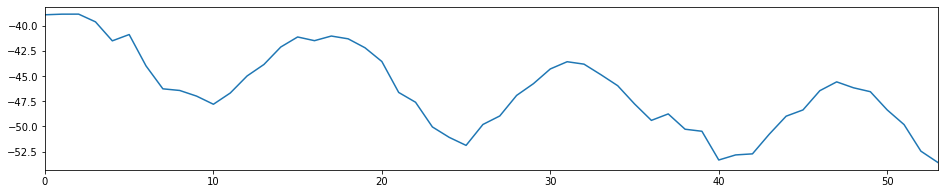

In [9]:
df3.yCoM.plot(figsize=(16, 3))

Note: It is expected to form a cycloid, but this graph seems to leans by some reason(maybe leans of camera). so, the inclination should be excluded to declear the cycloid curve.

In [10]:
# calculate the linear formula (i.e. noise)
peek_t = argrelmax(np.array(df3.yCoM), order=10)
peek_t = peek_t[0].tolist()
print(peek_t)

[2, 17, 31, 47]


In [11]:
peek_y = []
x = np.array(df3.yCoM.tolist())
for t in peek_t:
    peek_y.append(x[t])
print(peek_y)

[-38.851665000000004, -41.026325, -43.576077000000005, -45.57548]


In [12]:
a = Symbol("a")
b = Symbol("b")
ex1 = peek_t[0]*a + b - peek_y[0]
ex2 = peek_t[1]*a + b - peek_y[1]
ans = solve((ex1,ex2))
a = ans[a]
b = ans[b]
print(a,b)

-0.144977333333333 -38.5617103333333


In [13]:
x = 50
print(a*x+b)
print(df3.yCoM[x])

-45.8105770000000
-48.361940000000004


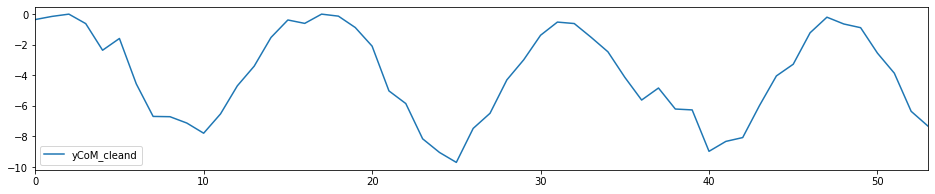

In [14]:
# exclusion of linear noise
data = [y-(a*i+b) for i,y in enumerate(df3.yCoM)]
data = pd.DataFrame({'yCoM_cleand':data})
data.yCoM_cleand = data.yCoM_cleand.astype(np.float32)
data.plot(figsize=(16,3))

In [15]:
repeek_t = argrelmax(np.array(data.yCoM_cleand), order=10)
repeek_t = repeek_t[0].tolist()
print(repeek_t)

[2, 17, 31, 47]


### Calculation of Walking width and velocity

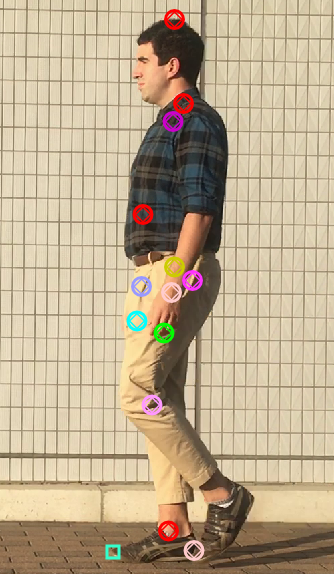

In [16]:
Image.open("ex7_6.png")

Note: I calculate pix_height by subtract 'head' from 'r_toe' in 1.84s.

In [17]:
print(df2[df2.t==1.84].head_y)
print(df2[df2.t==1.84].r_toe_y)

8    484.0
Name: head_y, dtype: float64
8   -311.0
Name: r_toe_y, dtype: float64


In [18]:
frame2time = 1.87/len(df3)
real_height = 189 # cm
pix_height = df2.head_y[df2.t==1.84].tolist()[0] - \
             df2.r_toe_y[df2.t==1.84].tolist()[0] # pix
pix_ratio = real_height / pix_height # cm/pix

In [19]:
pix_ratio

0.23773584905660378

#### Walking width

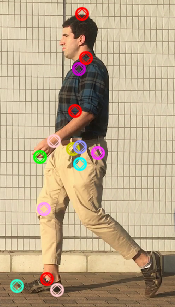

In [20]:
Image.open("ex7_7.png")

Note: I use walking step in 1.70s.

In [21]:
# from above picture step
witdh = abs(float(df2.r_toe_x[df2.t==1.7]) - float(df2.l_toe_x[df2.t==1.7]))*pix_ratio
print(witdh)

88.80622641509434


In [22]:
# from CoM (it may be incorrect)
witdh_byCoM = abs(df3.xCoM[31]-df3.xCoM[17])
print(witdh_byCoM)

116.020549


Note: If use CoM to calculate width, width will be longer.  
I think that it is because this way does not consider the foot rewind to step forward.   
i.e. when we walk forward our foot does not necessarily keep going forward.

#### Walking velocity

In [23]:
# Use CoM
vel = abs(df3.xCoM[31]-df3.xCoM[17])/((31-17)*frame2time)
print(vel)

239.30900099312453


In [24]:
# Use movie step (1.7s to 2.4s)
dist = abs(float(df2.r_toe_x[df2.t==2.4]) - float(df2.l_toe_x[df2.t==1.7]))*pix_ratio
vel = dist/(2.4-1.7)
print(vel)

239.29811320754717


Note: Unlike walking width calculation,each walking velocity is very near value.   
I think that it is natural because if they are different, it means our lower body run faster than upper body (or vice).

### Calculation of foot angle

#### Theta

In [25]:
deffx = df2.r_knee_x - df2.r_hip_x
deffy = df2.r_knee_y - df2.r_hip_y
theta = [math.atan(deffx[i]/deffy[i]) for i in range(len(deffx))]
theta = pd.DataFrame({'Theta':theta})

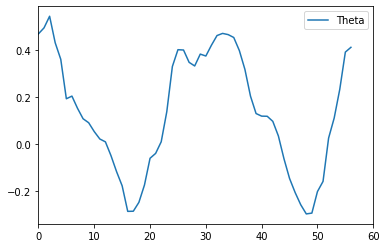

In [26]:
theta.plot()

#### Phi

In [27]:
deffx = df2.r_ankle_x - df2.r_knee_x
deffy = df2.r_ankle_y - df2.r_knee_y
phi = [math.atan(deffx[i]/deffy[i]) for i in range(len(deffx))]
phi = pd.DataFrame({'Phi':phi})

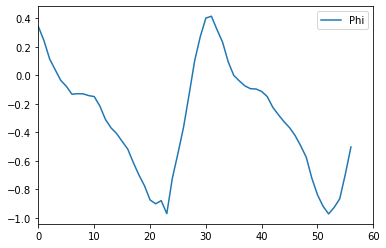

In [28]:
phi.plot()

### Estimation of Cycloid curve prameters ($R, r, y_0$)

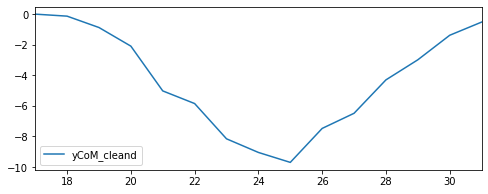

In [29]:
# Use one period
period = data[17:32]
period.plot(figsize=(8,3))

In [195]:
angle = [2*math.pi/(len(period)-1)*i for i in range(len(period))]
x = list(df3.xCoM[17:32])
y = [i for i in period.yCoM_cleand]
y0 = (max(y)+min(y))/2
# real_y0 may be 109cm

Optimize by NN.

#### Regress  '$r$'

In [172]:
def Cycloid_y(arg):
    cos = K.backend.cos(arg[0])
    return y0 - arg[1]*cos

In [173]:
theta = K.layers.Input(shape=(1,))
dense = K.layers.Dense(64, activation='relu')(theta)
r = K.layers.Dense(1)(dense)
reg = K.layers.Lambda(Cycloid_y, output_shape=(1,))([theta,r])
model = K.Model(theta,reg)
model.compile(
    optimizer='adam',
    loss='mse'
)

In [174]:
model.fit(angle, y, batch_size=4, steps_per_epoch=1)

Train on 1 samples
1/1 [==============================] - 0s 488ms/step - loss: 11.1242


In [178]:
r_pred = model.predict_on_batch(angle)
r_pred = r_pred.mean()
print(r_pred)

-4.846323


#### Regress '$R$'

In [179]:
def Cycloid_x(arg):
    sin = K.backend.sin(arg[0])
    return arg[1]*arg[0] - r_pred*sin

In [180]:
theta = K.layers.Input(shape=(1,))
dense = K.layers.Dense(64, activation='relu')(theta)
R = K.layers.Dense(1)(dense)
reg = K.layers.Lambda(Cycloid_x, output_shape=(1,))([theta,R])
model = K.Model(theta,reg)
model.compile(
    optimizer='adam',
    loss='mse'
)

In [181]:
model.fit(angle, x, batch_size=4, steps_per_epoch=1)

Train on 1 samples
1/1 [==============================] - 1s 650ms/step - loss: 3026.2161


In [182]:
R_pred = model.predict_on_batch(angle)
R_pred = R_pred.mean()
print(R_pred)

-3.176807


In [184]:
x_pred = [R_pred*theta-r_pred*math.sin(theta) for theta in angle]
y_pred = [y0-r_pred*math.cos(theta) for theta in angle]

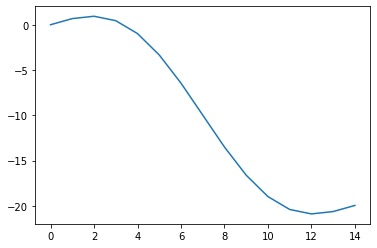

In [194]:
plt.plot(x_pred)

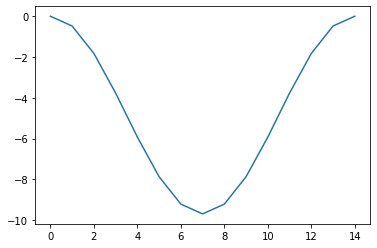

In [196]:
plt.plot(y_pred)